Reproducing work [in this article](https://appliedmachinelearning.blog/2017/11/25/unsupervised-changed-detection-in-multi-temporal-satellite-images-using-pca-k-means-python-code/). 

A simple intro to PCA is [here](http://dilloncamp.com/projects/pca.html)

TLDR is we use PCA for dimensionality reduction and use the X principle components as features for our k-means algorithm.

Basic process is:
1. Compute difference image
2. Determine principle components of the difference image
.
.
.

## Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, filters, feature
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
%matplotlib inline

Little trick to list package versions

In [4]:
!pip show scikit-image|grep Version

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!pip show scikit-learn|grep Version

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!pip show numpy|grep Version

'grep' is not recognized as an internal or external command,
operable program or batch file.


## Get familiar with imagery
We start with a visual inspection of our imagery, calculate the absolute difference and apply a couple of filters.

In [7]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 6CCF-2412

 Directory of C:\Users\nanda\Desktop\Final year\satellite-image-deep-learning\change_detection\using_pca_and_k_means - Copy

17-02-2020  15:00    <DIR>          .
17-02-2020  15:00    <DIR>          ..
16-02-2020  12:30    <DIR>          .ipynb_checkpoints
17-02-2020  15:00           374,768 change_detection.ipynb
13-02-2020  13:15           487,483 CubbieStation_08232013.jpg
13-02-2020  13:15           512,316 CubbieStation_08311987.jpg
13-02-2020  13:15               249 README.md
16-02-2020  12:47            42,065 ref_img.jpg
13-02-2020  13:14           197,194 ref_img.png
16-02-2020  12:47            43,970 test_img.jpg
13-02-2020  13:14           197,194 test_img.png
               8 File(s)      1,855,239 bytes
               3 Dir(s)  631,276,666,880 bytes free


In [8]:
image1 = rgb2gray(io.imread('ref_img.jpg'))
image2 = rgb2gray(io.imread('test_img.jpg'))

diff_image = abs(image1 - image2)
print(diff_image.shape)

(256, 256)


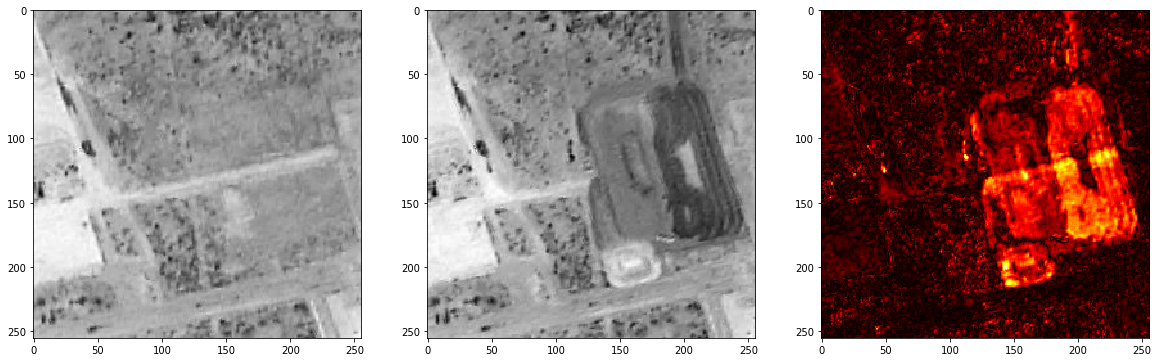

In [9]:
fig_width = 20
fig_height = 8

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(fig_width, fig_height))
ax1.imshow(image1, cmap="gray") 
ax2.imshow(image2, cmap="gray") 
ax3.imshow(diff_image, cmap="hot"); # crudely calc difference

A couple of things to note from this comparison:
* There is a lot of noise/change we dont care about
* Clouds will need to be handled in real scenario

## Determine Principle components
The original article rolls its own methods for calculating the principle components of the difference image, but sklearn provides us that functionality

In [14]:
n_components=50

pca = PCA(n_components=n_components)
pca.fit(diff_image)

diff_image_pca = pca.fit_transform(diff_image)
print(diff_image_pca.shape)

diff_image_restored = pca.inverse_transform(diff_image_pca)
print(diff_image_restored.shape)

(256, 50)
(256, 256)


In [15]:
np.sum(pca.explained_variance_ratio_)

0.9438330614838959

In [16]:
print(f"The {n_components} components explain {int(np.sum(pca.explained_variance_ratio_) * 100)}% of the variance")

The 50 components explain 94% of the variance


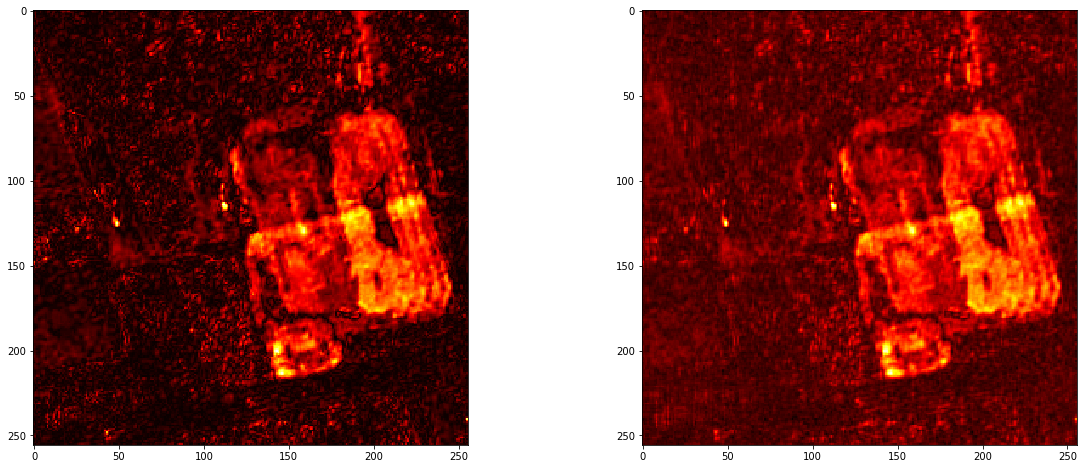

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

ax1.imshow(diff_image, cmap="hot") 
ax2.imshow(diff_image_restored, cmap="hot"); # crudely calc difference